<a href="https://colab.research.google.com/github/dani-lbnl/mudit/blob/main/Topic_Modeling_Top2Vec_BERTopic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Installation

In [1]:
!pip install --upgrade llvmlite
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan
# !pip install top2vec  # easy way to install Top2Vec
!pip install top2vec[sentence_encoders]  # install if using pre-trained universal sentence encoder options
# !pip install top2vec[sentence_transformers]  # install if using pre-trained BERT sentence transformer options

     |████████████████████████████████| 34.5 MB 2.0 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.51.2 requires llvmlite<0.35,>=0.34.0.dev0, but you have llvmlite 0.38.0 which is incompatible.
  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-0oio1xo_/hdbscan_7571819d94c745308e7c5c1111845c52
  Running command git clone -q https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-0oio1xo_/hdbscan_7571819d94c745308e7c5c1111845c52
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330865

In [2]:
from top2vec import Top2Vec
import pandas as pd
import numpy as np
import multiprocessing
import time

multiprocessing.cpu_count()

2

## Preparing dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
df = pd.read_table('/content/drive/MyDrive/LBNL/Pubs.xls')
abstracts = list(df[~df['Abstract'].isna()]['Abstract'])

In [5]:
# for title
indices = df['Title'].isna()
df.loc[indices,'Title'] = ""

# for abstract
indices = df['Abstract'].isna()
df.loc[indices,'Abstract'] = ""

# combined - title + abstract
df['Combined'] = df['Title'] + " " + df['Abstract']
combined = list(df['Combined'])

In [6]:
# remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
  

new_df= []
for doc in combined:
  filt_combined = []
  for word in word_tokenize(doc):
    # print(word)
    if word not in stopwords.words('english'):
      # print(word)
      filt_combined.append(word)
  new_df.append(" ".join(filt_combined))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
new_df

## Top2Vec on pubs.xlsx

#### on combined (stop words not removed)

In [7]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_reviews = Top2Vec(documents=combined, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-03-25 15:47:16,537 - top2vec - INFO - Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-25 15:47:16,779 - top2vec - INFO - Downloading universal-sentence-encoder model
2022-03-25 15:47:36,581 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-25 15:47:40,220 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  war

Total time taken (mins):  0


In [8]:
# show the total number of topics
model_reviews.get_num_topics() 

7

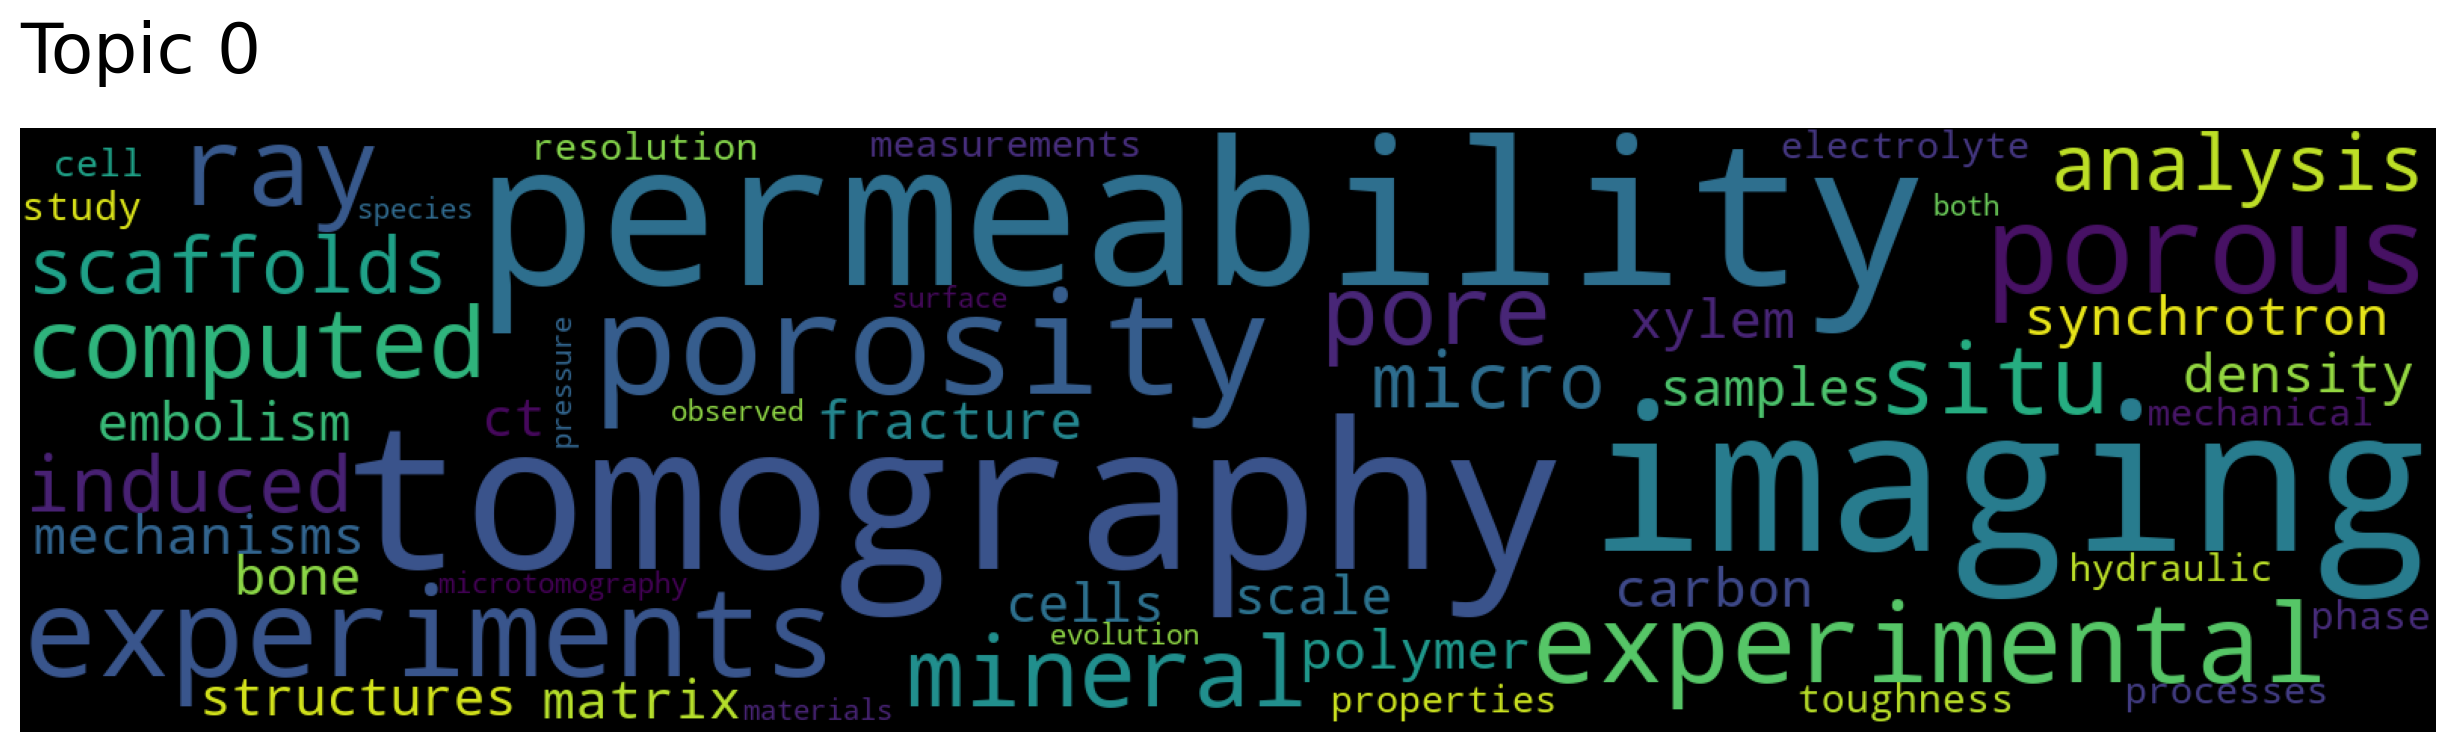

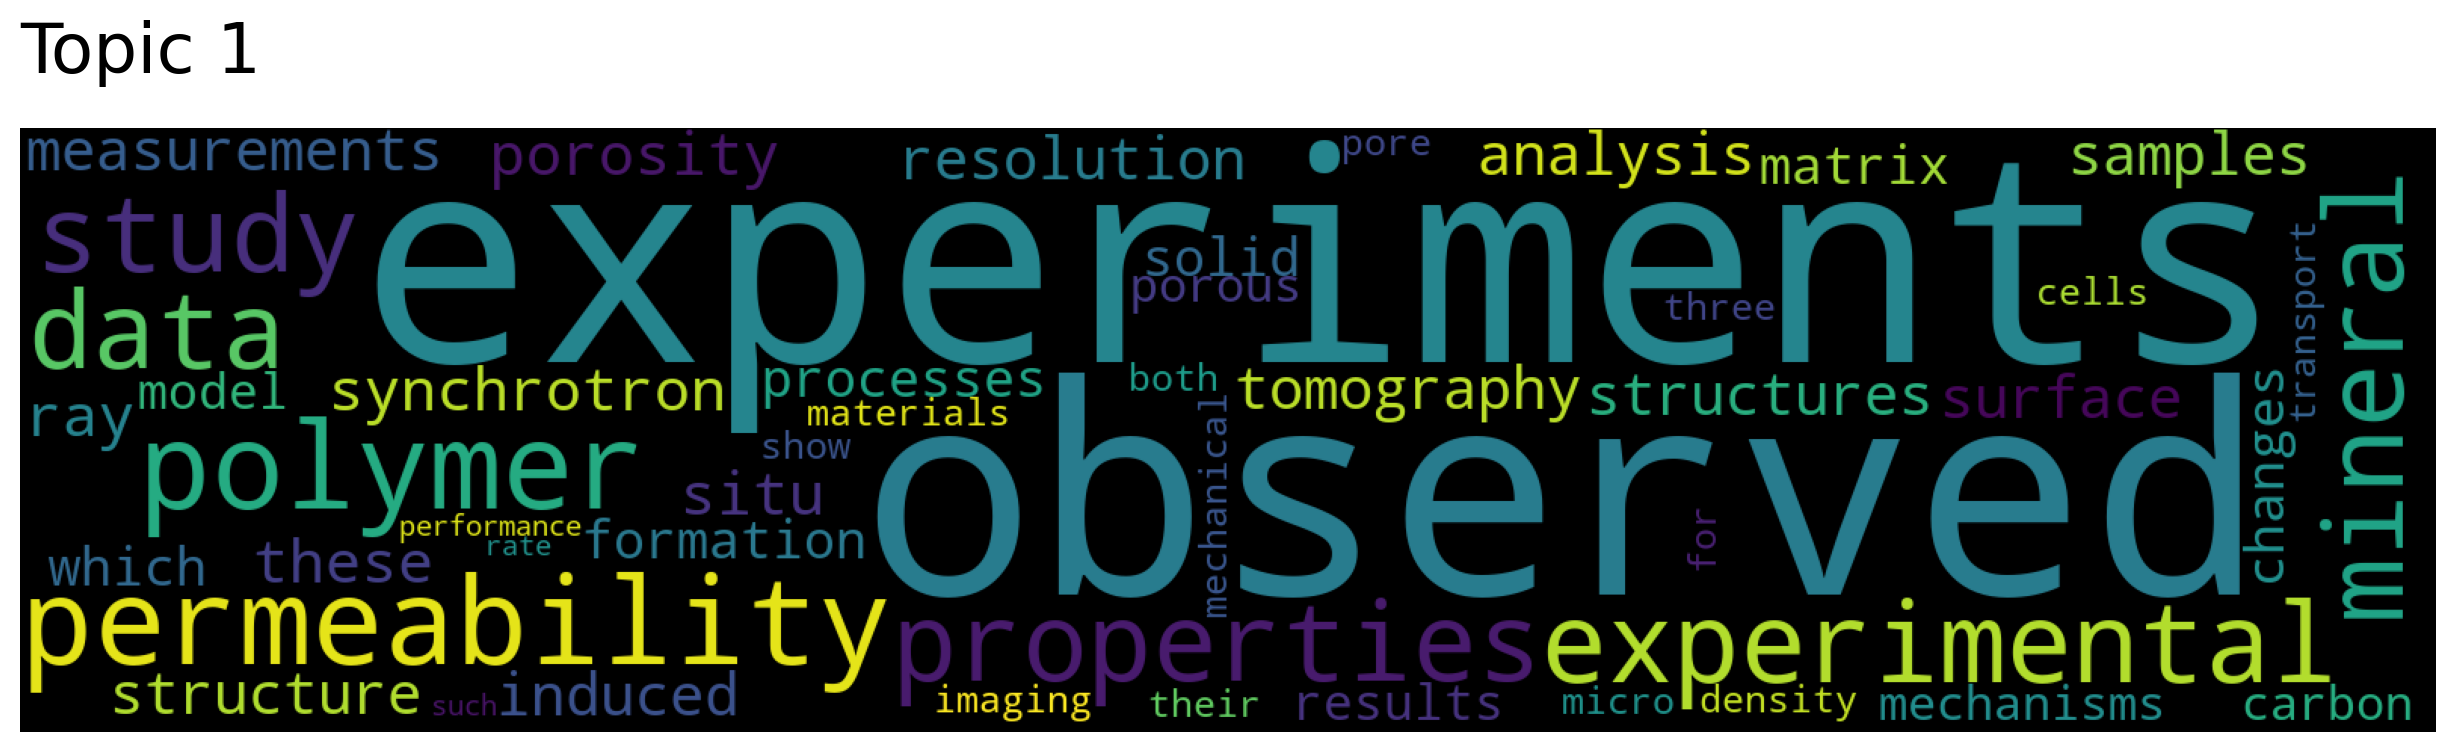

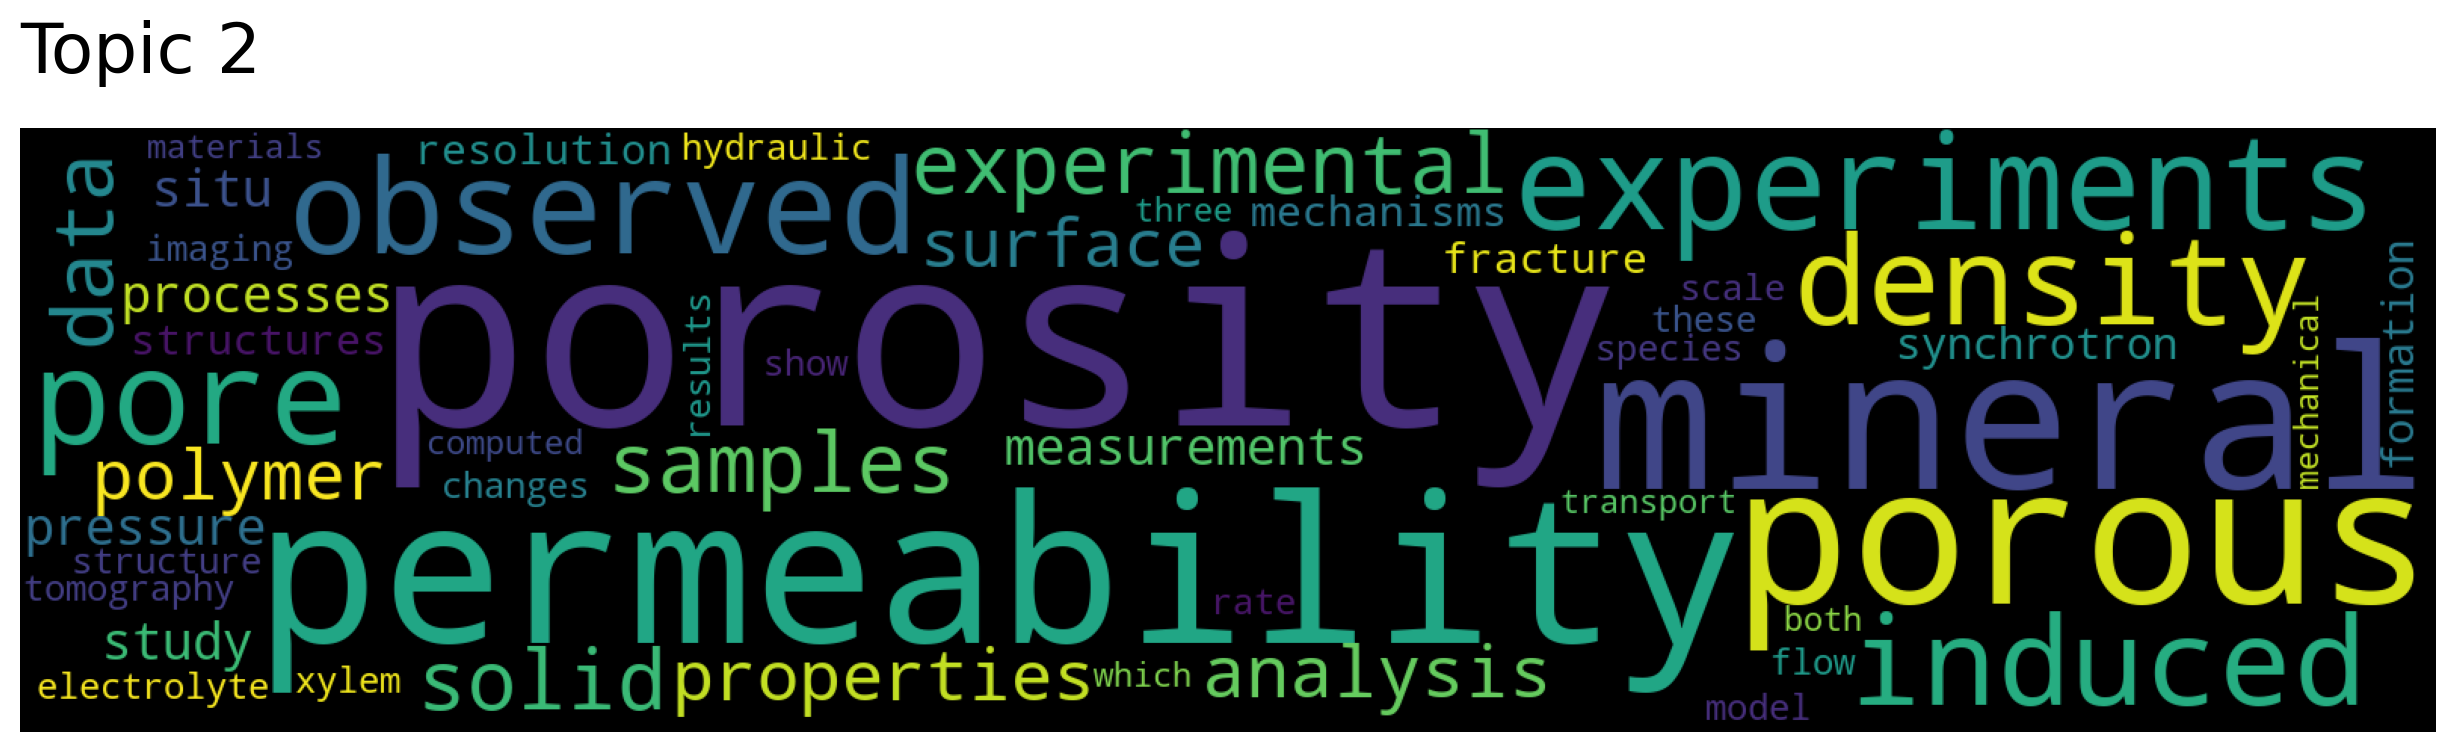

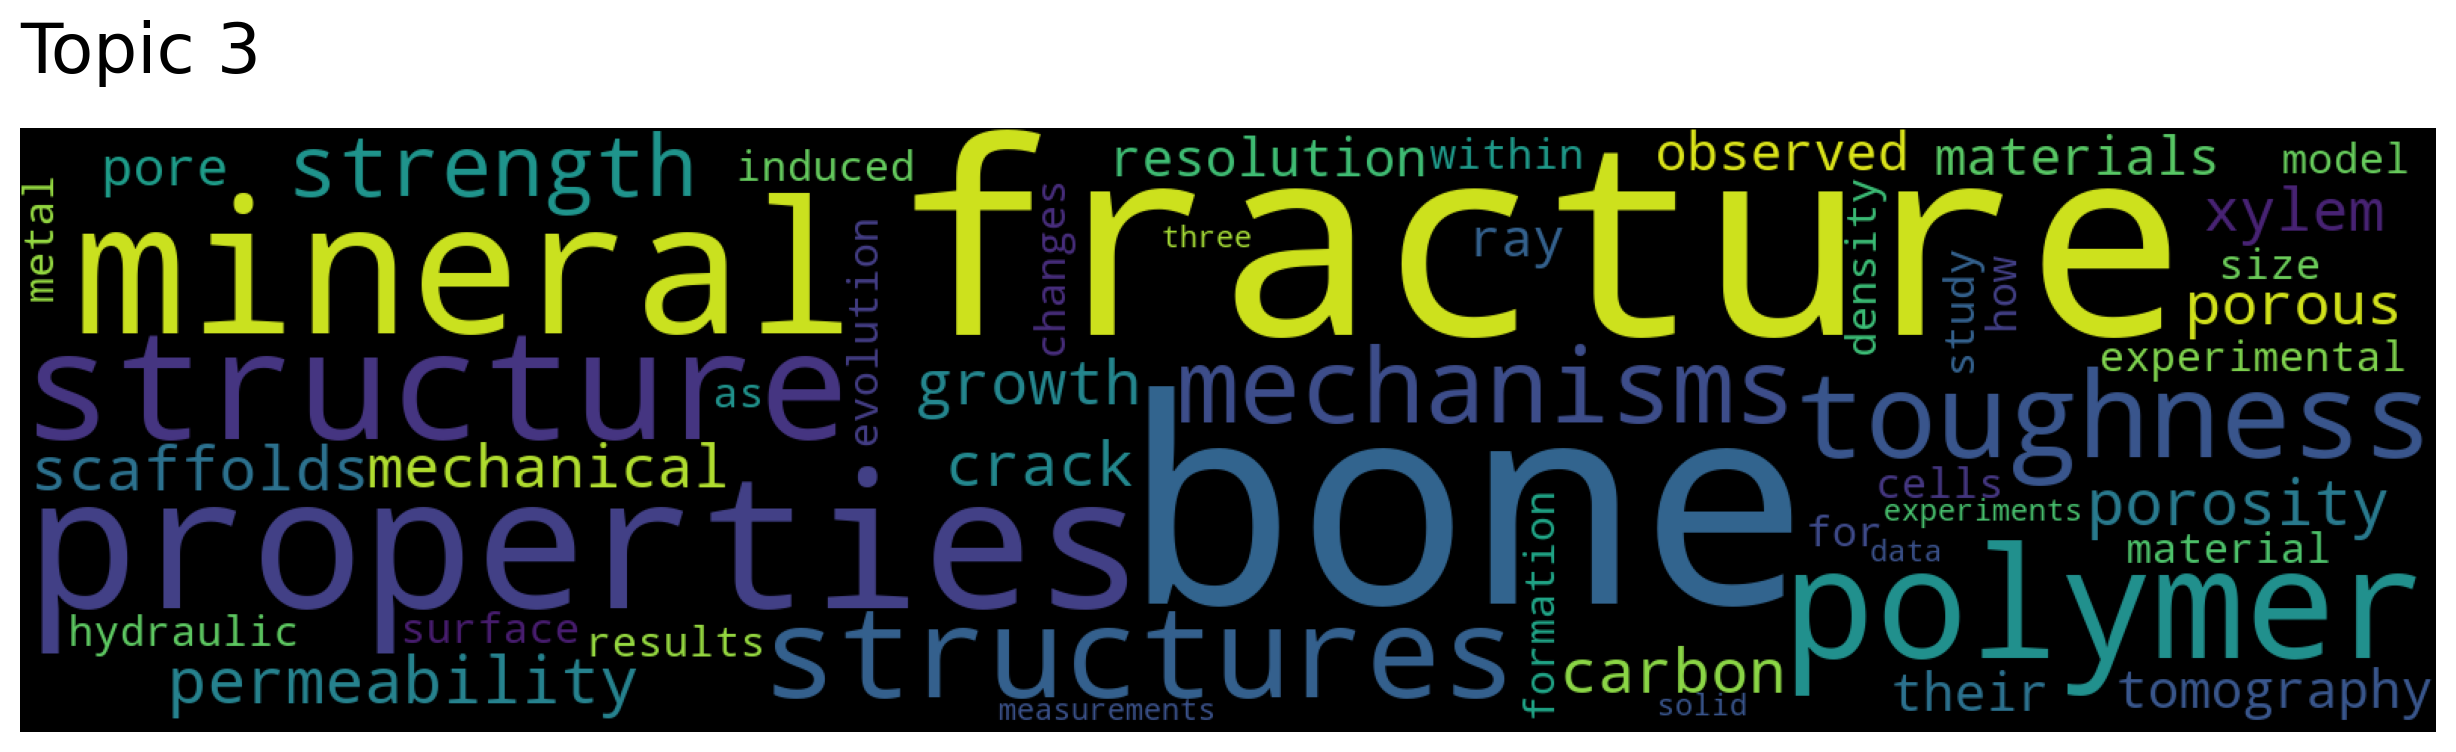

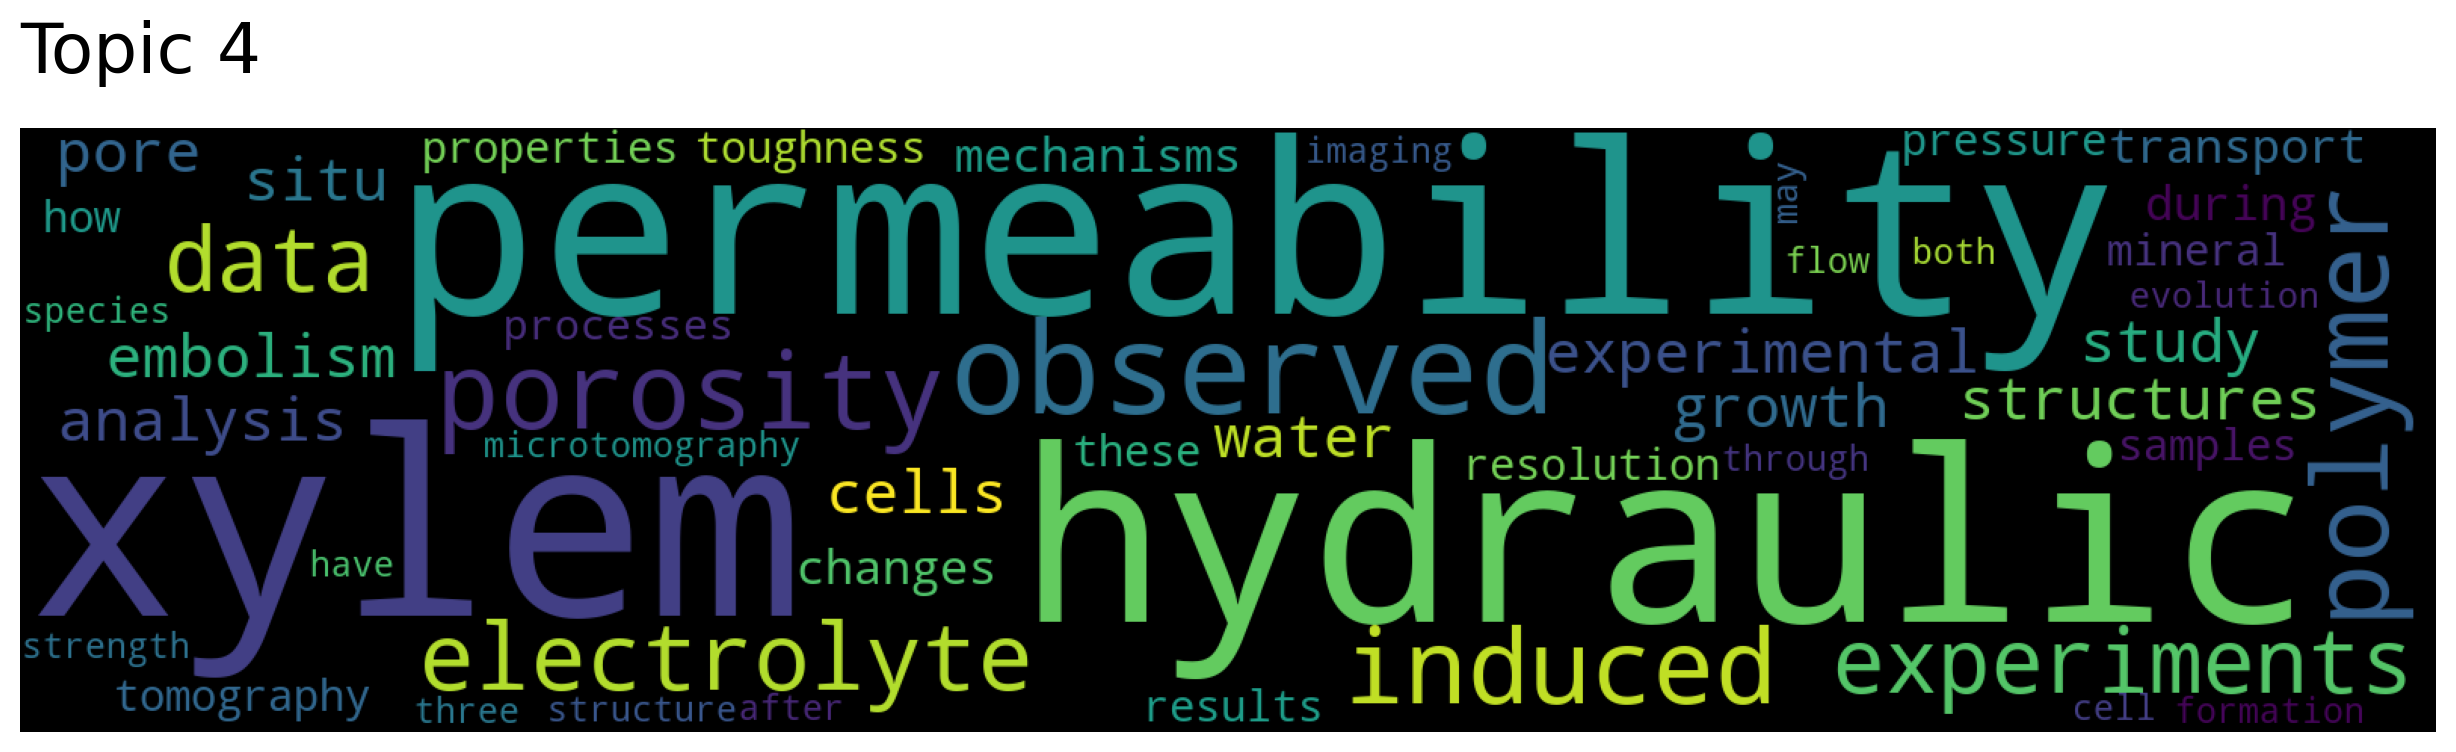

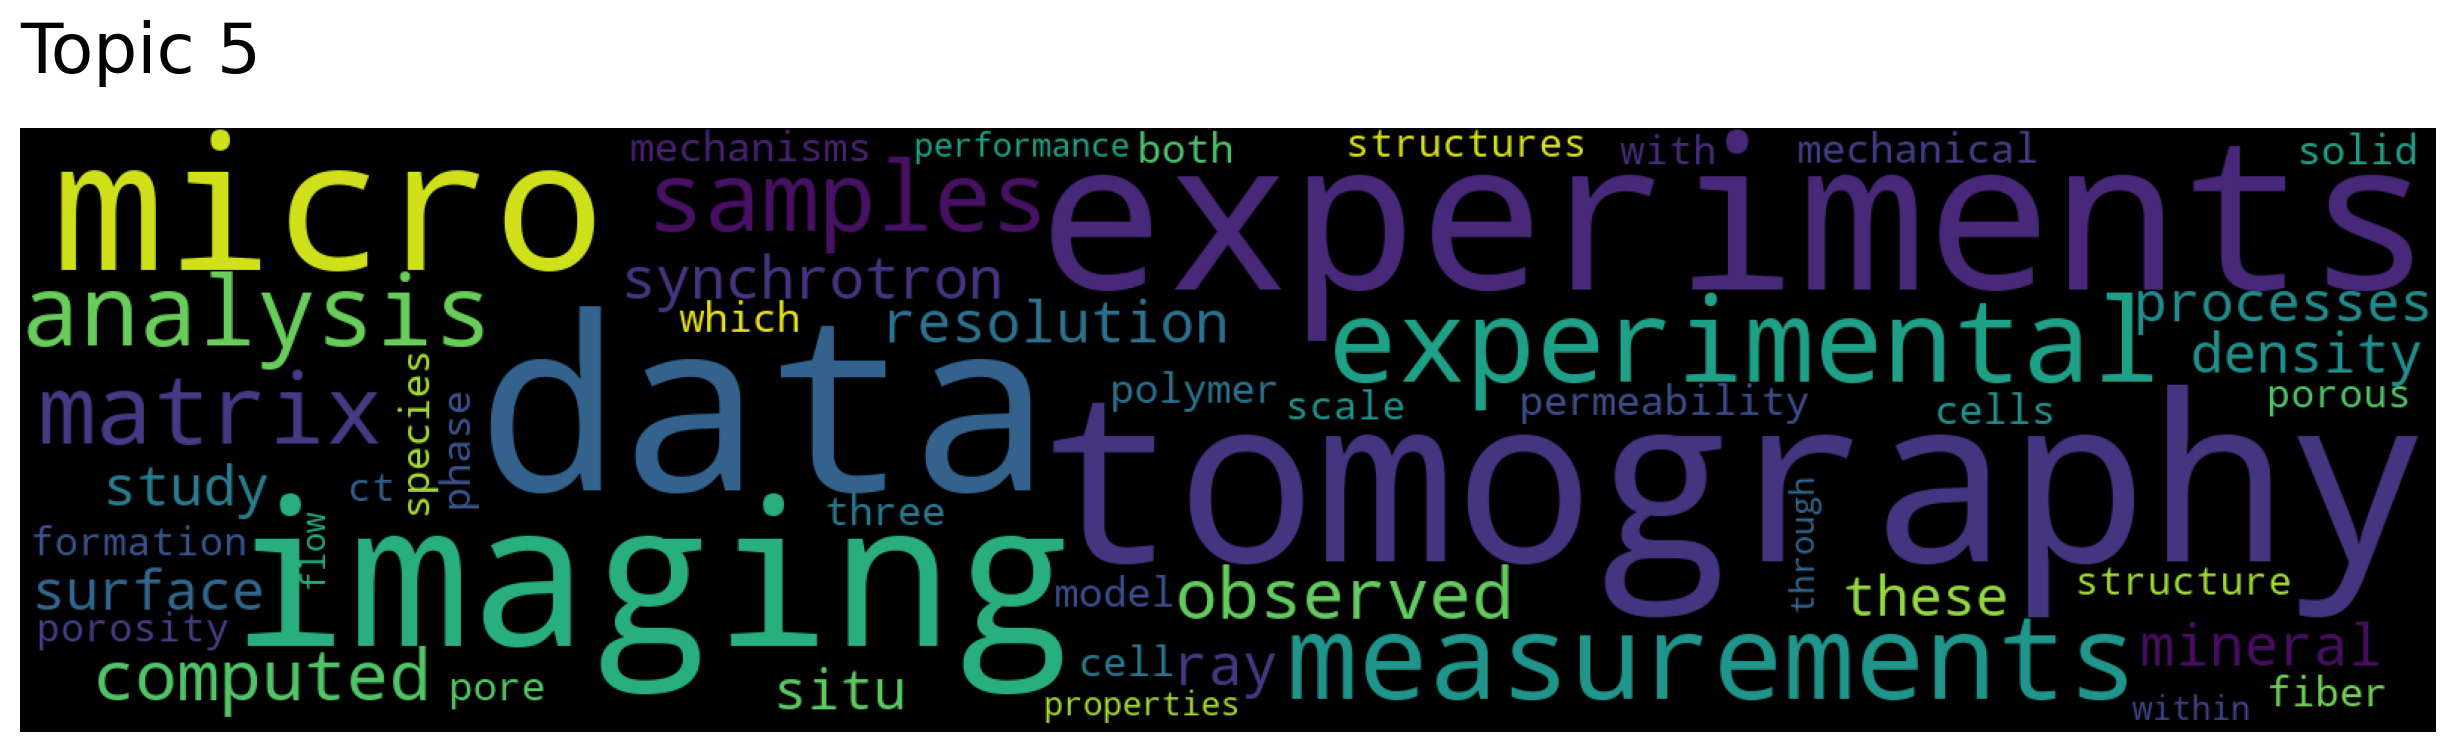

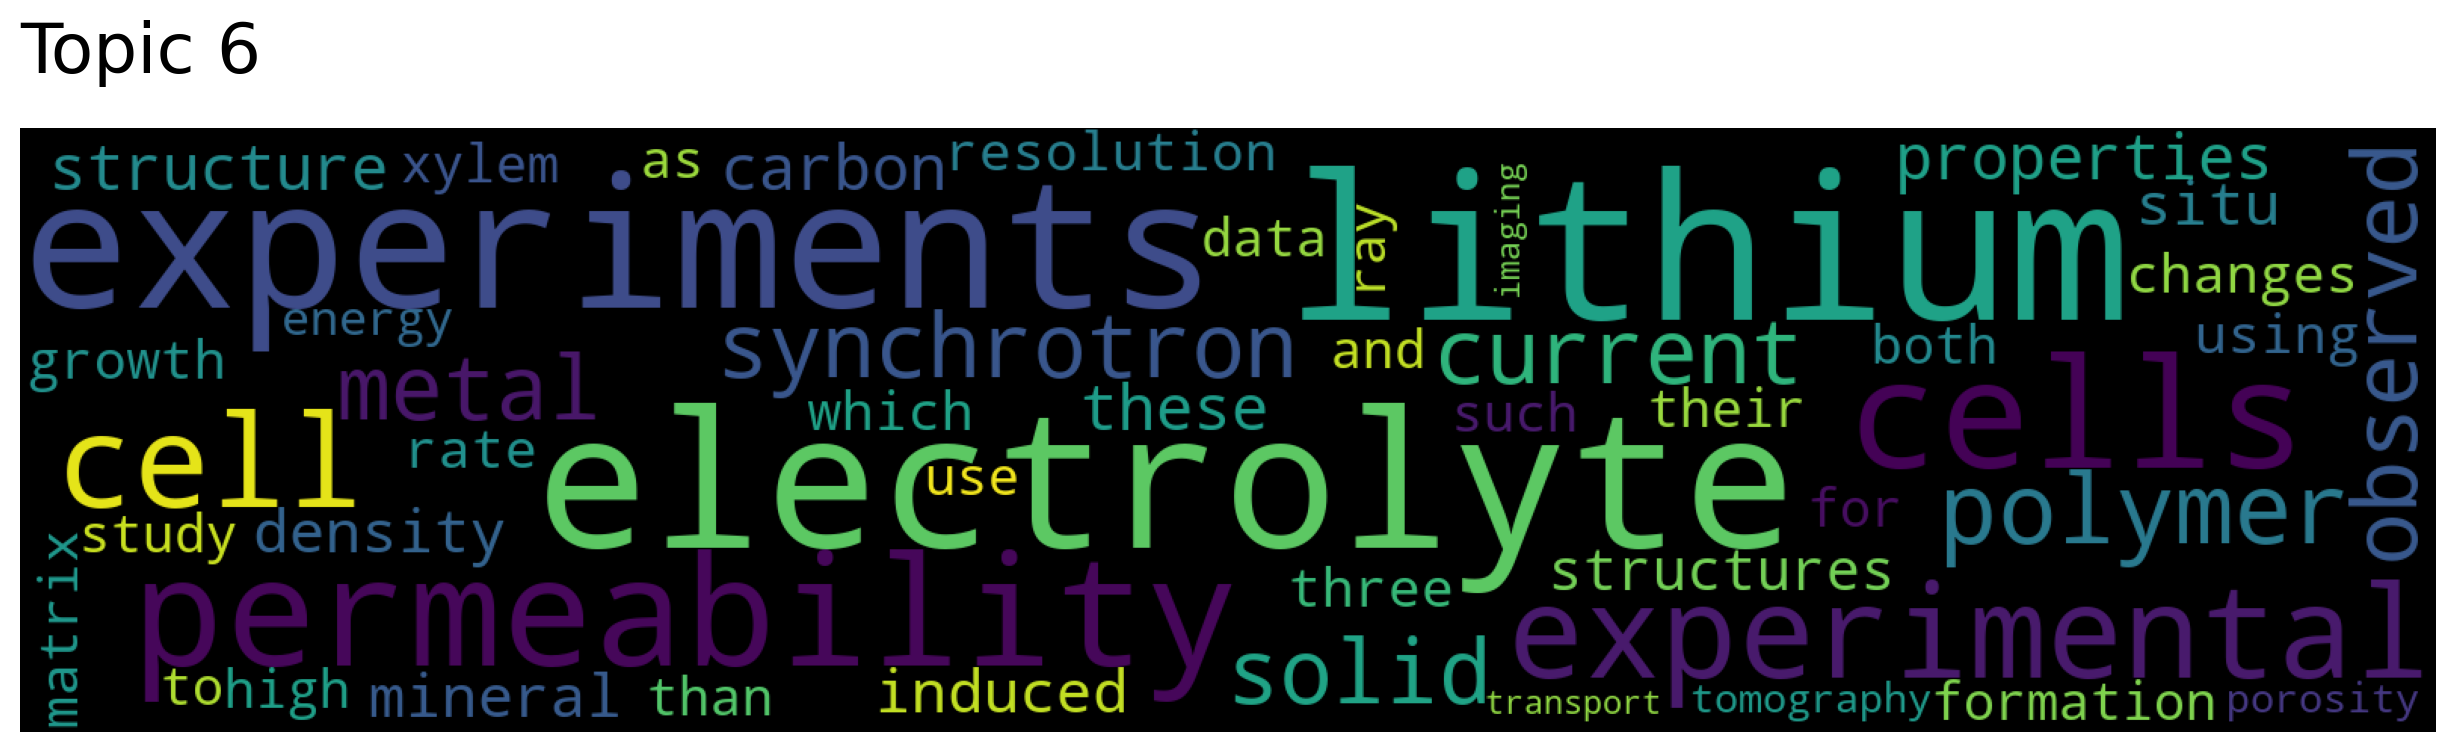

In [13]:
topic_words, word_scores, topic_nums = model_reviews.get_topics(model_reviews.get_num_topics())
for topic in topic_nums[:7]:
    model_reviews.generate_topic_wordcloud(topic)

In [10]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_reviews.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 319, Score: 0.8157116174697876
-----------
Micro-tomography based analysis of thermal conductivity, diffusivity and oxidation behavior of rigid and flexible fibrous insulators Material properties and oxidation behavior of low-density felts used as substrates for conformal carbon/phenolic ablators were compared with those of a rigid carbon fiber preform used to manufacture heritage lightweight ablators. Synchrotron X-ray micro-tomography measurements were performed to characterize the materials’ microstructure at the scale of the fibers. Using the tomography voxels as computational grids, tortuosity in the continuum regime, and room temperature conductivity were computed. Micro-scale simulations of the oxidation of carbon fibers were carried out using a random walk model for oxygen diffusion and a sticking probability law to model surface reactions. The study shows that, due to a higher porosity and lower connectivity, the felt materials have lower thermal conductivity but a f

In [11]:
words, word_scores = model_reviews.similar_words(keywords=["tomography"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

imaging 0.5299621288647671
embolism 0.4667333559005267
ct 0.43697211709808015
synchrotron 0.4169693143002183
microtomography 0.4099750027971195
induced 0.40701209028497626
scaffolds 0.3840783556885203
matrix 0.36890877524056054
cells 0.3666332735027048
mineral 0.3581242161851964
fracture 0.357955406265151
analysis 0.3474062086140899
mechanical 0.3432506227140724
porous 0.3305312141404452
bone 0.3301880112442652
permeability 0.325324504148819
electrolyte 0.3189053352742297
experiments 0.3138263454432384
cell 0.3038608015715143
micro 0.30229144494717


In [12]:
# search doc by keywords
documents, document_scores, document_ids = model_reviews.search_documents_by_keywords(keywords=["tomography"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 241, Score: 0.38114950708428563
-----------
High temperature x-ray micro-tomography 
-----------

Document: 151, Score: 0.32256621067517377
-----------
Coded Aperture  Imaging  for  Fluorescent  X-rays-Biomedical Applications 
-----------

Document: 275, Score: 0.2983448964452247
-----------
Electrode slurry particle density mapping using X-ray radiography 
-----------

Document: 238, Score: 0.29227490872281714
-----------
X-ray Phase Imaging and Computed Tomography with Sandpaper Analyzer 
-----------

Document: 437, Score: 0.27845160983593237
-----------
Scalable method for micro-CT analysis enables large scale quantitative characterization of brain lesions and implants Anatomic evaluation is an important aspect of many studies in neuroscience; however, it often lacks information about the three-dimensional structure of the brain. Micro-CT imaging provides an excellent, nondestructive, method for the evaluation of brain structure, but current applications to neurophysiologi

#### on new_df (stopwords removed)


In [15]:
start_time = time.time()
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())
model_stop_removed = Top2Vec(documents=new_df, embedding_model='universal-sentence-encoder')
# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='distiluse-base-multilingual-cased')  # run on GPU to speed things up
print('Total time taken (mins): ', int((time.time()-start_time)/60))

# model_reviews = Top2Vec(documents=hotel_reviews, embedding_model='universal-sentence-encoder')  # uncomment to use universal sentence encoder
# model_reviews = Top2Vec(documents=hotel_reviews, speed="deep-learn", workers=multiprocessing.cpu_count())  # uncomment to use Doc2Vec

2022-03-25 15:52:15,805 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-03-25 15:52:16,005 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-03-25 15:52:21,180 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-03-25 15:52:21,753 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-03-25 15:52:31,028 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-03-25 15:52:31,065 - top2v

Total time taken (mins):  0


In [16]:
# show the total number of topics
model_stop_removed.get_num_topics() 

5

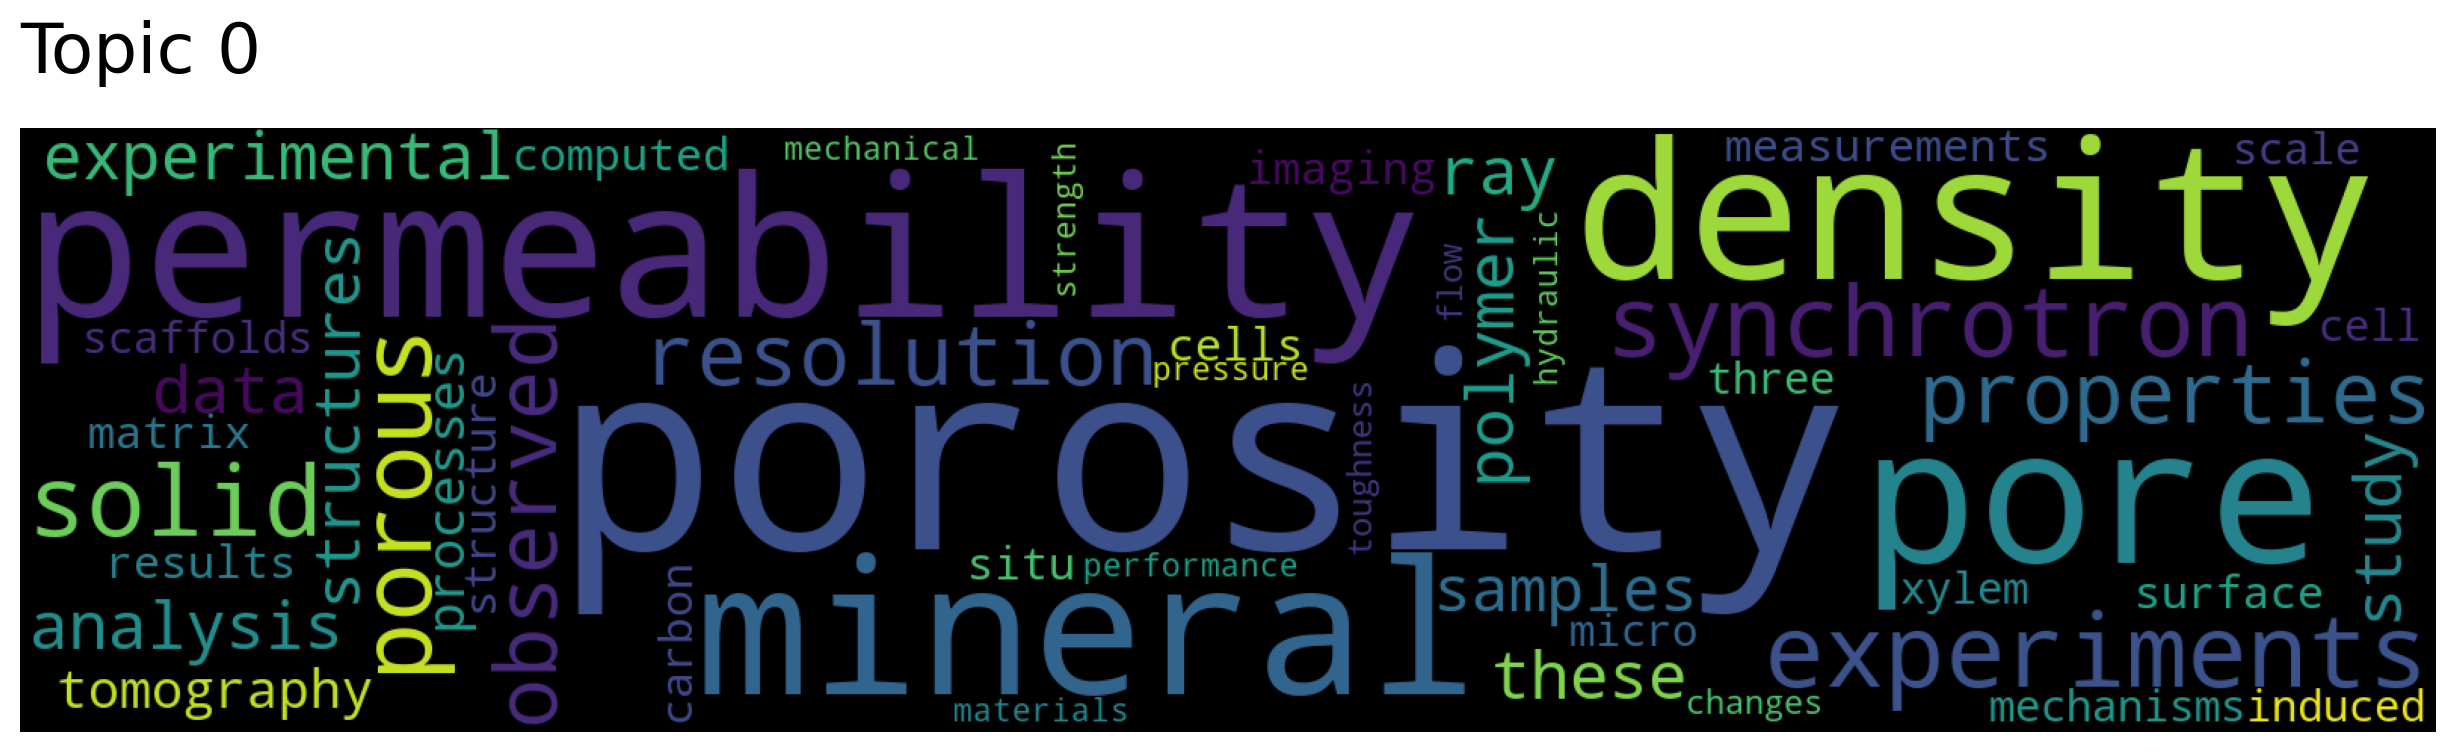

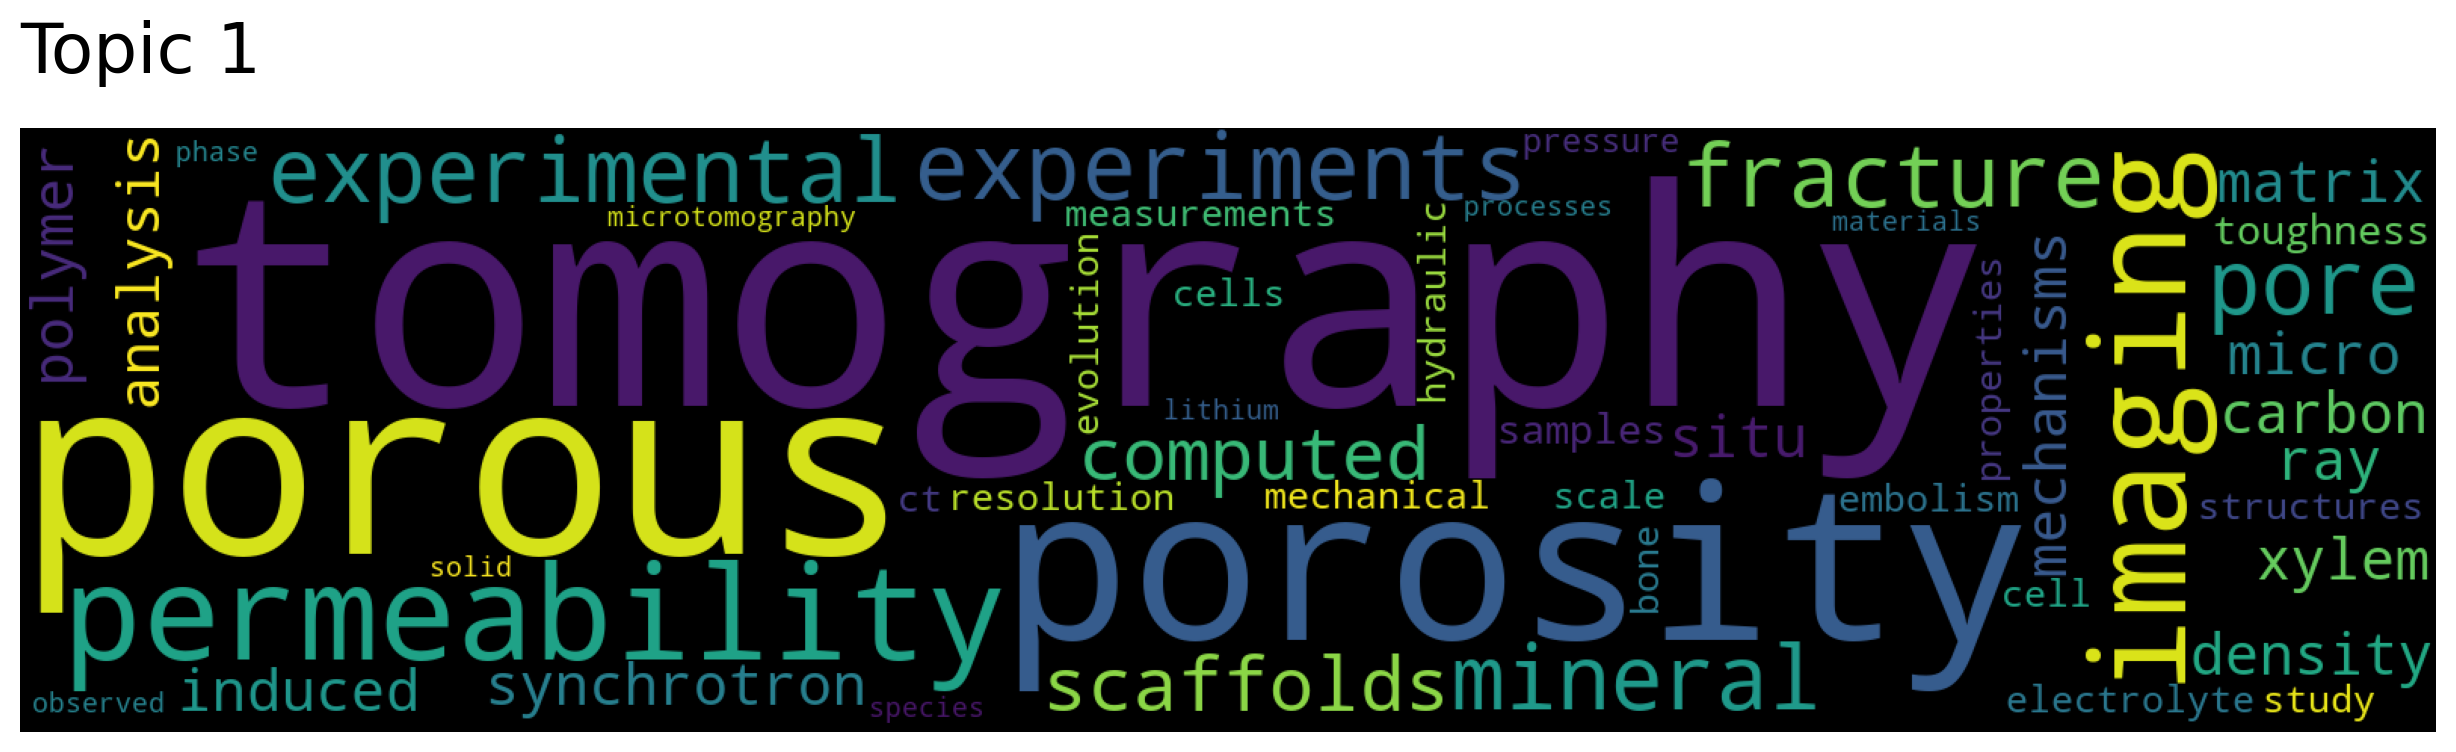

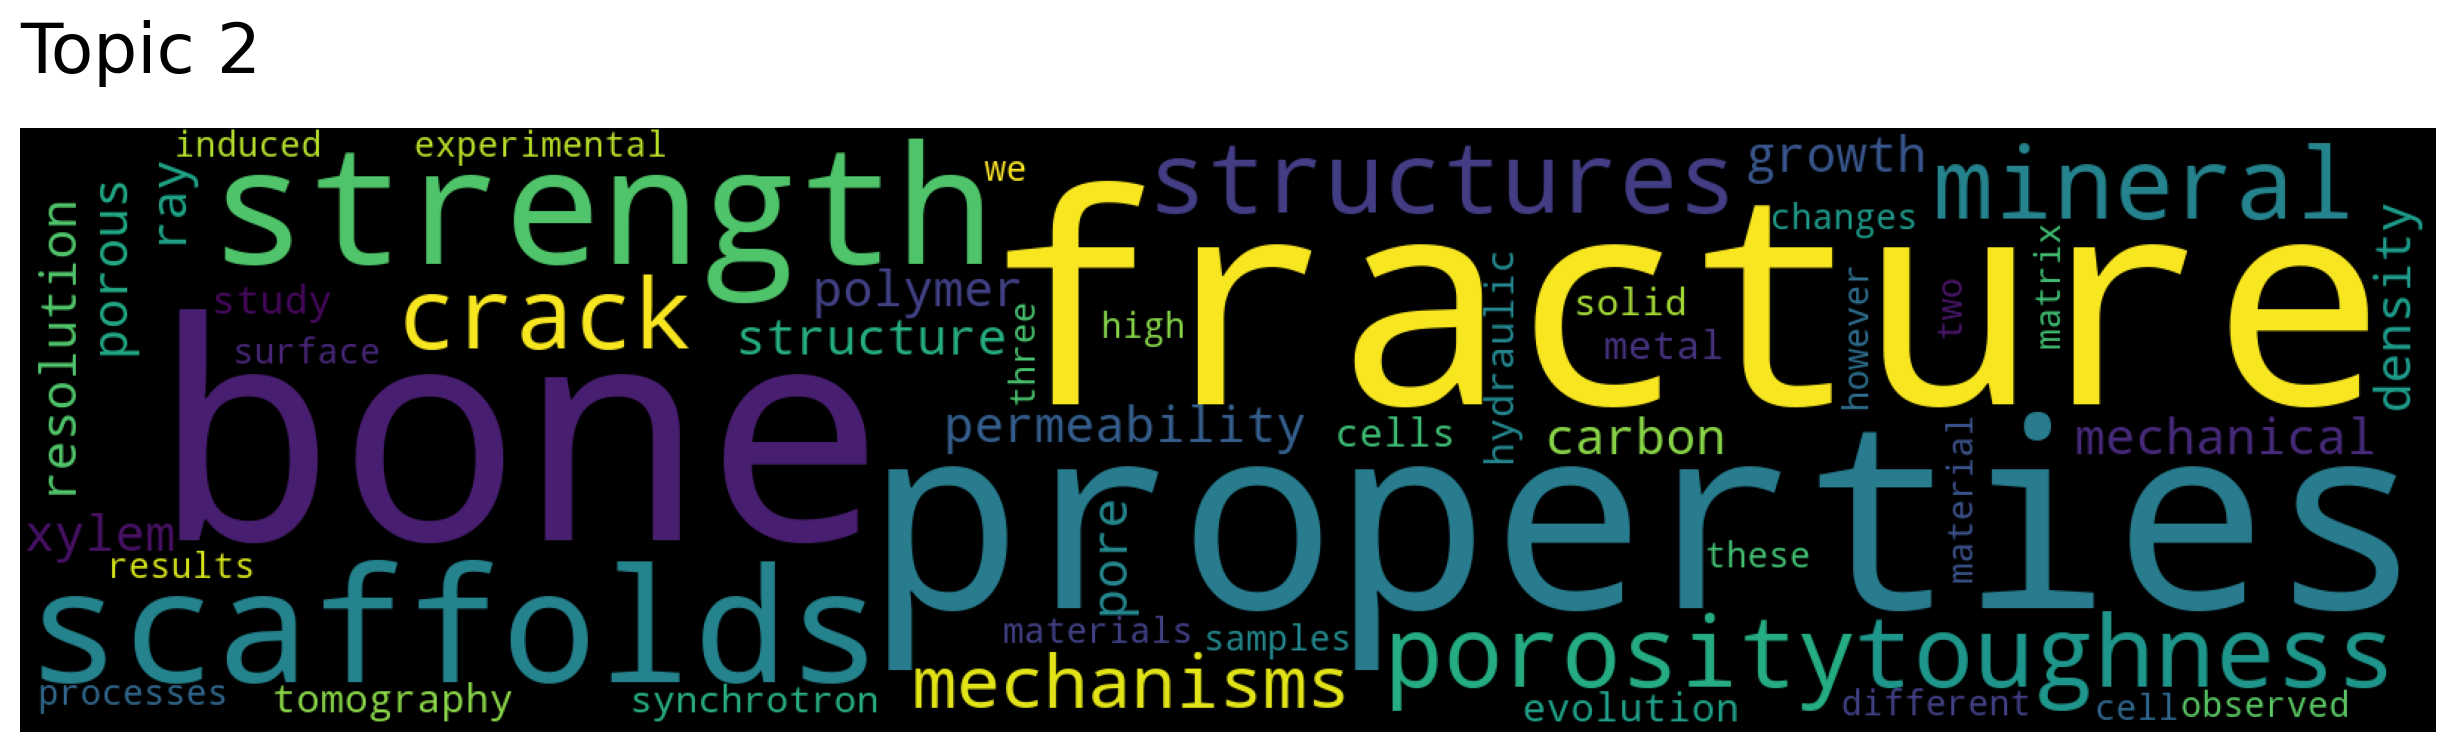

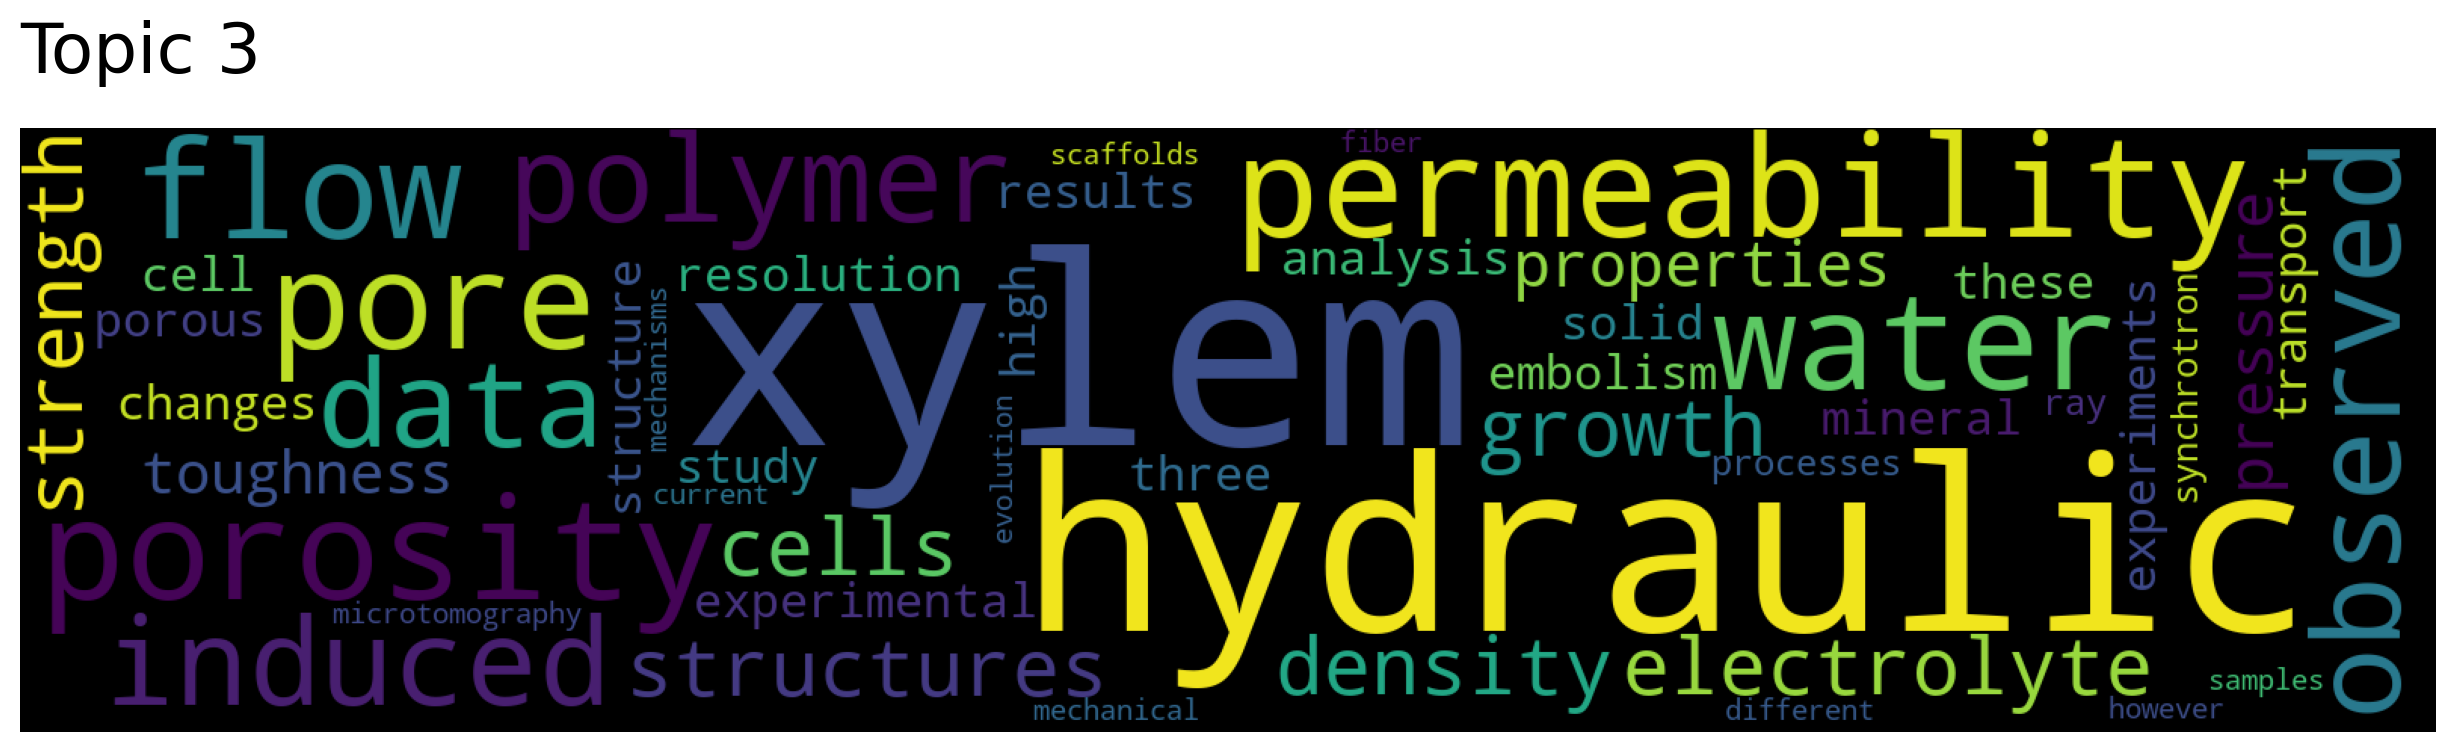

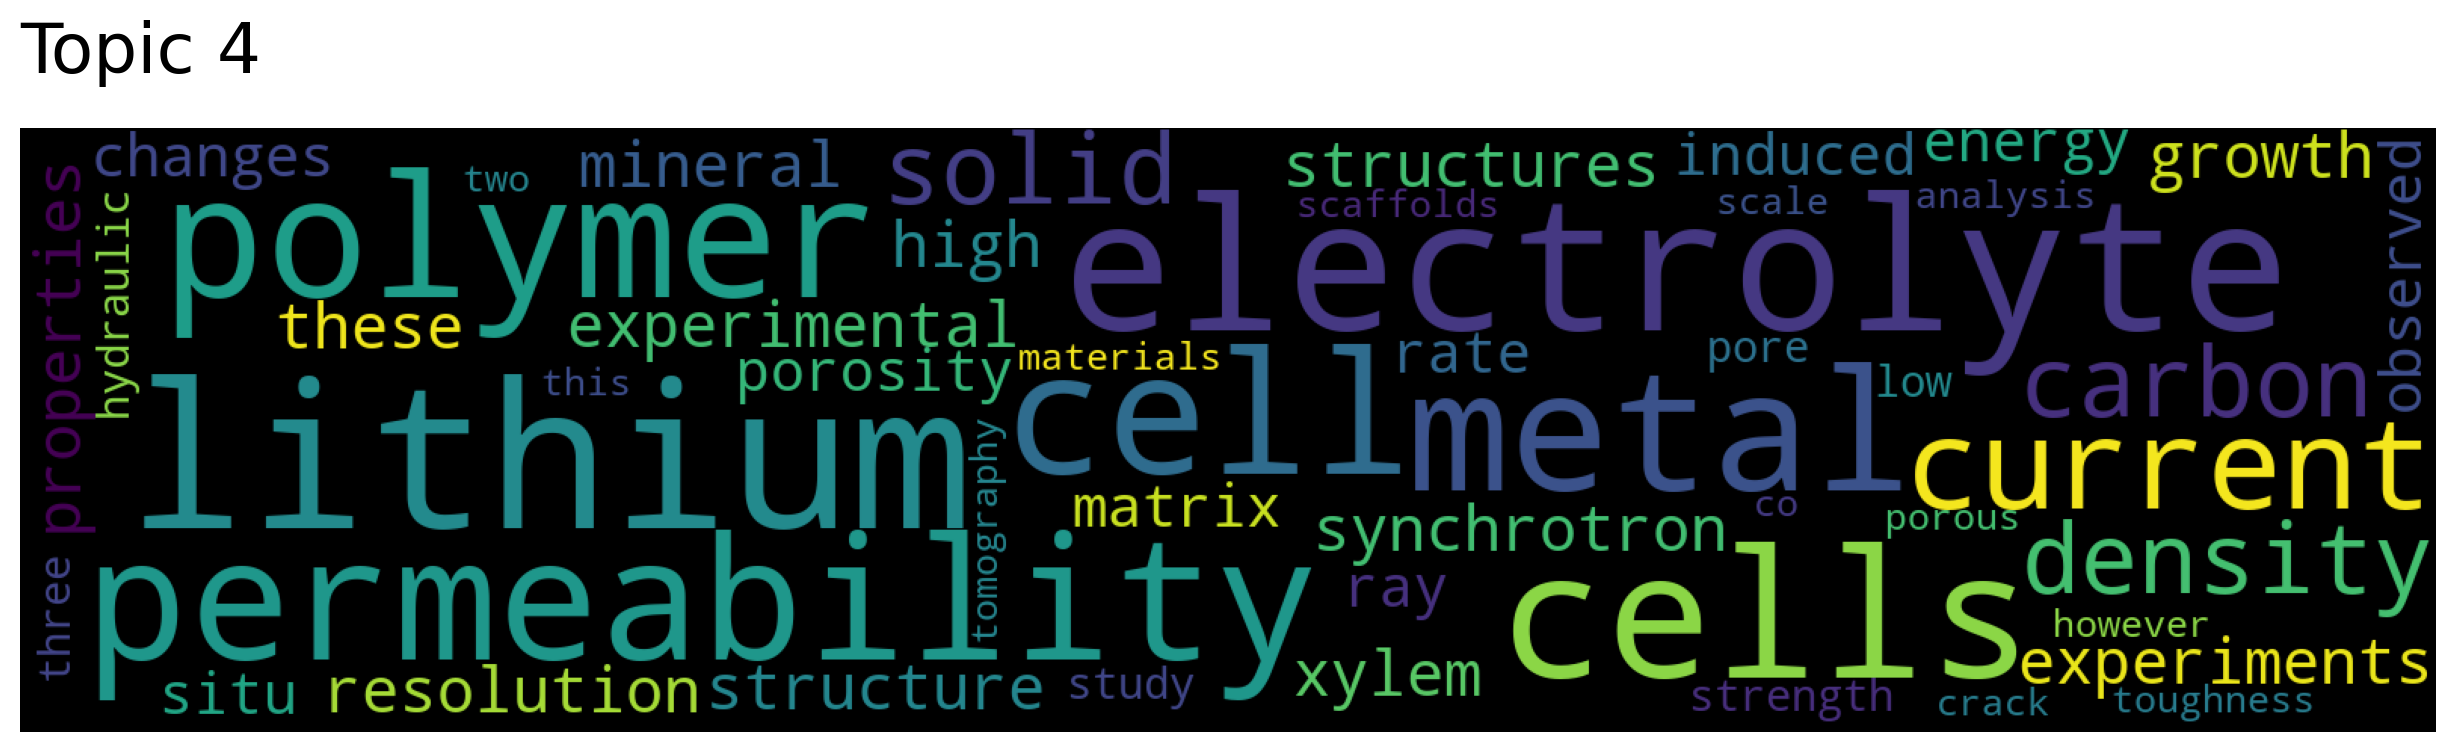

In [17]:
topic_words, word_scores, topic_nums = model_stop_removed.get_topics(model_stop_removed.get_num_topics())
for topic in topic_nums[:7]:
    model_stop_removed.generate_topic_wordcloud(topic)

In [18]:
# find cosuments most similar to topic 1
documents, document_scores, document_ids = model_stop_removed.search_documents_by_topic(topic_num=1, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 258, Score: 0.7096825242042542
-----------
Pore-scale multiphase flow modeling imaging CO [ d2 ] exsolution Sandstone
-----------

Document: 30, Score: 0.6876474618911743
-----------
Probing Dynamics Biomineralization Pore Scale Using X-ray Computed Tomography
-----------

Document: 370, Score: 0.6585570573806763
-----------
Pore-scale topology analysis flame stabilization inside inert porous media using X-ray microtomography
-----------

Document: 325, Score: 0.6584458947181702
-----------
X-Ray Computed Tomography Microstructure Evolution Polymer Impregnation Pyrolysis Processing Ceramic Matrix Composites
-----------

Document: 238, Score: 0.6525757312774658
-----------
X-ray Phase Imaging Computed Tomography Sandpaper Analyzer
-----------



In [19]:
words, word_scores = model_stop_removed.similar_words(keywords=["tomography"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

imaging 0.5299621777649944
embolism 0.4667333925464471
ct 0.4369721093403249
synchrotron 0.41696935944293373
microtomography 0.4099750433294113
induced 0.4070120909003778
scaffolds 0.3840783589033091
matrix 0.3689087712141358
cells 0.3666332967044179
mineral 0.35812424812444954
fracture 0.3579554173039311
analysis 0.34740616936226365
mechanical 0.34325065993465137
porous 0.330531238530303
bone 0.33018809454110803
permeability 0.32532448405720227
electrolyte 0.31890531565539804
experiments 0.31382637256671875
cell 0.3038608115222295
micro 0.30229137231336367


### BERTopic

In [20]:
!pip install bertopic

     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 3.8 MB 46.1 MB/s 
     |████████████████████████████████| 1.2 MB 34.7 MB/s 
     |████████████████████████████████| 67 kB 5.1 MB/s 
     |████████████████████████████████| 636 kB 44.9 MB/s 
     |████████████████████████████████| 895 kB 37.6 MB/s 
     |████████████████████████████████| 6.5 MB 31.3 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=a793481ba999507627a8dbcc119d3b651f3c7bb3bae05b7a9cff724a0eb3719c
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [17]:
pip install bertopic[spacy]

     |████████████████████████████████| 6.0 MB 5.6 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 181 kB 48.4 MB/s 
     |████████████████████████████████| 653 kB 34.7 MB/s 
     |████████████████████████████████| 10.1 MB 32.1 MB/s 
     |████████████████████████████████| 451 kB 18.1 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [21]:
from bertopic import BERTopic

In [22]:
topic_model_stop = BERTopic()
topics, probs = topic_model_stop.fit_transform(new_df)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
topic_model_stop.get_topic_info()

Topic  Count                                       Name
0     -1     75                 -1_ash_the_xray_conversion
1      0     63            0_xylem_species_embolism_vessel
2      1     62       1_bone_fracture_properties_toughness
3      2     57                   2_inf_pore_area_reactive
4      3     55          3_xray_tomography_the_synchrotron
5      4     35            4_pumice_magma_eruption_bubbles
6      5     33              5_transport_water_porous_fuel
7      6     29  6_lithium_batteries_electrolyte_electrode
8      7     19      7_data_algorithms_parallel_facilities
9      8     12                8_soil_water_compaction_eps

In [25]:
topic_model_stop.visualize_topics()


In [26]:
topic_model_stop.visualize_barchart()

In [27]:
topic_model_stop.visualize_heatmap()

### Using SciBERT

In [28]:
!pip install flair

     |████████████████████████████████| 322 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 788 kB 42.2 MB/s 
     |████████████████████████████████| 981 kB 36.4 MB/s 
     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 48 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 35.2 MB/s 
     |████████████████████████████████| 19.7 MB 1.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9692 sha256=b8dd92c1e5af3c27d3f19170865838357c28b00e4f399c3f6d8b60417882c7b9
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=bf6bf79ebb986fca691845a6

In [29]:
from flair.embeddings import TransformerDocumentEmbeddings

scibert_emb = TransformerDocumentEmbeddings('allenai/scibert_scivocab_uncased')
topic_model_scibert = BERTopic(embedding_model=scibert_emb)

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/223k [00:00<?, ?B/s]

2022-03-25 15:58:38,012 No model_max_length in Tokenizer's config.json - setting it to 512. Specify desired model_max_length by passing it as attribute to embedding instance.


Downloading:   0%|          | 0.00/422M [00:00<?, ?B/s]

In [33]:
import time
start_time = time.time()
topic_model_scibert = BERTopic()
topics_scibert, probs_scibert = topic_model_scibert.fit_transform(new_df)
print('Total time taken (mins): ', int((time.time()-start_time)/60))


Total time taken (mins):  0


In [36]:
topic_model_scibert.get_topic_info()

Topic  Count                                          Name
0      -1     97                    -1_the_xray_ash_tomography
1       0     59                  0_inf_pore_permeability_area
2       1     46                   1_xylem_embolism_vessel_inf
3       2     45          2_bone_fracture_properties_toughness
4       3     35                 3_transport_water_porous_fuel
5       4     35               4_pumice_magma_eruption_bubbles
6       5     28  5_lithium_batteries_electrolyte_electrolytes
7       6     20                   6_xray_phase_synchrotron_3d
8       7     19         7_data_algorithms_parallel_facilities
9       8     16          8_species_cheliceral_spiders_muscles
10      9     14           9_soil_water_rhizosphere_phosphorus
11     10     13              10_scaffolds_glass_strength_bone
12     11     13        11_fiber_matrix_impregnation_evolution

In [34]:
topic_model_scibert.visualize_topics()

In [37]:
topic_model_scibert.visualize_barchart()

### only on Energy Sci Domain